<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C3/W2/ungraded_labs/C3_W2_Lab_3_imdb_subwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ungraded Lab: Subword Tokenization with the IMDB Reviews Dataset

In this lab, you will look at a pre-tokenized dataset that is using subword text encoding. This is an alternative to word-based tokenization which you have been using in the previous labs. You will see how it works and its implications on preparing your data and training your model.

Let's begin!


## Download the IMDB reviews plain text and tokenized datasets

First, you will download the [IMDB Reviews](https://www.tensorflow.org/datasets/catalog/imdb_reviews) dataset from Tensorflow Datasets. You will get two configurations:

* `plain_text` - this is the default and the one you used in Lab 1 of this week
* `subwords8k` - a pre-tokenized dataset (i.e. instead of sentences of type string, it will already give you the tokenized sequences). You will see how this looks in later sections.

In [ ]:
import tensorflow_datasets as tfds

imdb_plaintext, info_plaintext = tfds.load("imdb_reviews", with_info = True, as_supervised = True)
imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k")

In [2]:
#!pip install tensorflow-datasets

You should consider upgrading via the 'c:\users\felix\anaconda3\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 4.2/4.2 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 48.8/48.8 KB ? eta 0:00:00
     ---------------------------------------- 86.9/86.9 KB 4.8 MB/s eta 0:00:00
     -------------------------------------- 241.5/241.5 KB 7.5 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21500 sha256=d541199287f44b15cd4756611f852bbfd28dbc96a2c45f61c4f62299f6921139
  Stored in directory: c:\users\felix\appdata\local\pip\cache\wheels\54\aa\01\724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built promise


In [3]:
import tensorflow_datasets as tfds

# Download the plain text default config
imdb_plaintext, info_plaintext = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

# Download the subword encoded pretokenized dataset
imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Dataset imdb_reviews downloaded and prepared to C:\Users\felix\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


Dataset imdb_reviews downloaded and prepared to C:\Users\felix\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0. Subsequent calls will reuse this data.


## Compare the two datasets

As mentioned, the data types returned by the two datasets will be different. For the default, it will be strings as you also saw in Lab 1. Notice the description of the `text` key below and the sample sentences:

In [5]:
# Print description of features
info_plaintext.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})

In [45]:
for example in imdb_plaintext['train'].take(2):
    print(example[0].numpy())
    print(len(str(example[0].numpy(),'utf-8').split()),'\n')
    

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
116 

b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot developme

In [8]:
# Take 2 training examples and print the text feature
for example in imdb_plaintext['train'].take(2):
  print(example[0].numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [ ]:
print(len(str(example[0].numpy())[2:].split()))

For `subwords8k`, the dataset is already tokenized so the data type will be integers. Notice that the `text` features also include an `encoder` field and has a `vocab_size` of around 8k, hence the name.

In [6]:
# Print description of features
info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

If you print the results, you will not see string sentences but a sequence of tokens:

112

In [13]:
for example2 in imdb_subwords['train'].take(2):
    print(example2)
    print(len(example2[0].numpy()),"\n")

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

In [ ]:
example2

In [23]:
# Take 2 training examples and print its contents
for example2 in imdb_subwords['train'].take(2):
  print(example2)
  print(len(str(example[0].numpy()))

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

You can get the `encoder` object included in the download and use it to decode the sequences above. You'll see that you will arrive at the same sentences provided in the `plain_text` config:

In [63]:
tokenizer_subwords = info_subwords.features['text'].encoder

In [19]:
for example in imdb_subwords['train'].take(2):
    print(tokenizer_subwords.decode(example[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [17]:
info_subwords.features['text']

Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>)

In [14]:
info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

<tf.Tensor: shape=(142,), dtype=int64, numpy=
array([  12,   31,   93,  867,    7, 1256, 6585, 7961,  421,  365,    2,
         26,   14,    9,  988, 1089,    7,    4, 6728,    6,  276, 5760,
       2587,    2,   81, 6118, 8029,    2,  139, 1892, 7961,    5, 5402,
        246,   25,    1, 1771,  350,    5,  369,   56, 5397,  102,    4,
       2547,    3, 4001,   25,   14, 7822,  209,   12, 3531, 6585, 7961,
         99,    1,   32,   18, 4762,    3,   19,  184, 3223,   18, 5855,
       1045,    3, 4232, 3337,   64, 1347,    5, 1190,    3, 4459,    8,
        614,    7, 3129,    2,   26,   22,   84, 7020,    6,   71,   18,
       4924, 1160,  161,   50, 2265,    3,   12, 3983,    2,   12,  264,
         31, 2545,  261,    6,    1,   66,    2,   26,  131,  393,    1,
       5846,    6,   15,    5,  473,   56,  614,    7, 1470,    6,  116,
        285, 4755, 2088, 7961,  273,  119,  213, 3414, 7961,   23,  332,
       1019,    3,   12, 7667,  505,   14,   32,   44,  208, 7975],
      dtyp

In [36]:
for example in imdb_subwords['train'].take(2):
  print(tokenizer_subwords.decode(example[0].numpy()))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [74]:
tokenizer_subwords.encode('episode , ')

[1997, 1199]

In [41]:
for i in example[0].numpy():
    print(f"{i}:{tokenizer_subwords.decode([i])}")

12:I 
31:have 
93:been 
867:known 
7:to 
1256:fall 
6585:asleep
7961: 
421:during 
365:films
2:, 
26:but 
14:this 
9:is 
988:usually 
1089:due 
7:to 
4:a 
6728:combination 
6:of 
276:things 
5760:inclu
2587:ding
2:, 
81:really 
6118:tire
8029:d
2:, 
139:being 
1892:warm
7961: 
5:and 
5402:comfort
246:able 
25:on 
1:the 
1771:set
350:te 
5:and 
369:having 
56:just 
5397:eate
102:n 
4:a 
2547:lot
3:. 
4001:However 
25:on 
14:this 
7822:occas
209:ion 
12:I 
3531:fell 
6585:asleep
7961: 
99:because 
1:the 
32:film 
18:was 
4762:rubbish
3:. 
19:The 
184:plot 
3223:development 
18:was 
5855:const
1045:ant
3:. 
4232:Cons
3337:tant
64:ly 
1347:slow 
5:and 
1190:boring
3:. 
4459:Thing
8:s 
614:seemed 
7:to 
3129:happen
2:, 
26:but 
22:with 
84:no 
7020:explanation 
6:of 
71:what 
18:was 
4924:cau
1160:sing 
161:them 
50:or 
2265:why
3:. 
12:I 
3983:admit
2:, 
12:I 
264:may 
31:have 
2545:missed 
261:part 
6:of 
1:the 
66:film
2:, 
26:but 
131:i 
393:watched 
1:the 
5846:majority 
6:of 
15:it 
5

In [30]:
example[0]

<tf.Tensor: shape=(142,), dtype=int64, numpy=
array([  12,   31,   93,  867,    7, 1256, 6585, 7961,  421,  365,    2,
         26,   14,    9,  988, 1089,    7,    4, 6728,    6,  276, 5760,
       2587,    2,   81, 6118, 8029,    2,  139, 1892, 7961,    5, 5402,
        246,   25,    1, 1771,  350,    5,  369,   56, 5397,  102,    4,
       2547,    3, 4001,   25,   14, 7822,  209,   12, 3531, 6585, 7961,
         99,    1,   32,   18, 4762,    3,   19,  184, 3223,   18, 5855,
       1045,    3, 4232, 3337,   64, 1347,    5, 1190,    3, 4459,    8,
        614,    7, 3129,    2,   26,   22,   84, 7020,    6,   71,   18,
       4924, 1160,  161,   50, 2265,    3,   12, 3983,    2,   12,  264,
         31, 2545,  261,    6,    1,   66,    2,   26,  131,  393,    1,
       5846,    6,   15,    5,  473,   56,  614,    7, 1470,    6,  116,
        285, 4755, 2088, 7961,  273,  119,  213, 3414, 7961,   23,  332,
       1019,    3,   12, 7667,  505,   14,   32,   44,  208, 7975],
      dtyp

In [25]:
tokenizer_subwords.decode([3])

', '

In [ ]:
# Get the encoder
tokenizer_subwords = info_subwords.features['text'].encoder

# Take 2 training examples and decode the text feature
for example in imdb_subwords['train'].take(2):
  print(tokenizer_subwords.decode(example[0]))

*Note: The documentation for the encoder can be found [here](https://www.tensorflow.org/datasets/api_docs/python/tfds/deprecated/text/SubwordTextEncoder) but don't worry if it's marked as deprecated. As mentioned, the objective of this exercise is just to show the characteristics of subword encoding.*

## Subword Text Encoding

From previous labs, the number of tokens in the sequence is the same as the number of words in the text (i.e. word tokenization). The following cells shows a review of this process.

In [42]:
train_data = imdb_plaintext['train']

In [43]:
training_sentences = []

In [47]:
for s,_ in train_data:
    training_sentences.append(s.numpy().decode('utf8'))

In [ ]:
# Get the train set
train_data = imdb_plaintext['train']

# Initialize sentences list
training_sentences = []

# Loop over all training examples and save to the list
for s,_ in train_data:
  training_sentences.append(s.numpy().decode('utf8'))

In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size =10000
oov_tok = '<OOV>'

# Initialize the Tokenizer class
tokenizer_plaintext = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer_plaintext.fit_on_texts(training_sentences)

# Generate the trainging sequences
sequences = tokenizer_plaintext.texts_to_sequences(training_sentences)


In [60]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
oov_tok = '<OOV>'

# Initialize the Tokenizer class
tokenizer_plaintext = Tokenizer(num_words = 10000, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer_plaintext.fit_on_texts(training_sentences)

# Generate the training sequences
sequences = tokenizer_plaintext.texts_to_sequences(training_sentences)

The cell above uses a `vocab_size` of 10000 but you'll find that it's easy to find OOV tokens when decoding using the lookup dictionary it created. See the result below:

In [59]:
tokenizer_plaintext.sequences_to_texts(sequences[0:1])

["this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it"]

In [61]:
# Decode the first sequence using the Tokenizer class
tokenizer_plaintext.sequences_to_texts(sequences[0:1])

["this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it"]

For binary classifiers, this might not have a big impact but you may have other applications that will benefit from avoiding OOV tokens when training the model (e.g. text generation). If you want the tokenizer above to not have OOVs, then the `vocab_size` will increase to more than 88k. This can slow down training and bloat the model size. The encoder also won't be robust when used on other datasets which may contain new words, thus resulting in OOVs again. 

In [75]:
len(tokenizer_plaintext.word_index)

88583

In [ ]:
# Total number of words in the word index dictionary
len(tokenizer_plaintext.word_index)

*Subword text encoding* gets around this problem by using parts of the word to compose whole words. This makes it more flexible when it encounters uncommon words. See how these subwords look like for this particular encoder:

In [79]:
print(tokenizer_subwords.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [ ]:
# Print the subwords
print(tokenizer_subwords.subwords)

If you use it on the previous plain text sentence, you'll see that it won't have any OOVs even if it has a smaller vocab size (only 8k compared to 10k above):

In [89]:
test_seq = [19, 7301, 6, 181, 38, 19, 5320, 4797, 54, 57, 3795, 22, 105, 342, 12, 284, 15, 11, 2782, 1316, 72, 12, 18, 2749, 3, 69, 9, 4, 27, 13, 18, 318, 5082, 6, 929, 44, 1, 101, 11, 13, 15, 2161, 3232, 36, 1, 5443, 7961, 6, 1, 5716, 8044, 2, 1, 5576, 2, 5, 1, 160, 2281, 4129, 7961, 256, 1, 631, 5, 309, 2854, 7961, 589, 6, 2849, 8029, 3, 69, 9, 20, 7881, 319, 3154, 20, 11, 2782, 7983, 2, 4, 1025, 5764, 6335, 25, 6, 1308, 107, 3054, 5, 7881, 1074, 3, 519, 609, 15, 177, 1, 2543, 9, 486, 5, 1, 1634, 2097, 3, 19, 7301, 6, 14, 27, 96, 35, 22, 105, 7, 1, 228, 6, 82, 1930, 7975]

for i in test_seq:
    print(f"{i}:{tokenizer_subwords.decode([i])}")

19:The 
7301:memory 
6:of 
181:the
38: "
19:The 
5320:Last 
4797:Hunt
54:" 
57:has 
3795:stuck 
22:with 
105:me 
342:since 
12:I 
284:saw 
15:it 
11:in 
2782:195
1316:6 
72:when 
12:I 
18:was 
2749:13
3:. 
69:It 
9:is 
4:a 
27:movie 
13:that 
18:was 
318:far 
5082:ahead 
6:of 
929:others 
44:at 
1:the 
101:time 
11:in 
13:that 
15:it 
2161:add
3232:ress
36:ed 
1:the 
5443:treatment
7961: 
6:of 
1:the 
5716:native
8044:s
2:, 
1:the 
5576:environment
2:, 
5:and 
1:the 
160:ever 
2281:present 
4129:contrast
7961: 
256:between 
1:the 
631:short 
5:and 
309:long 
2854:term
7961: 
589:effects 
6:of 
2849:gree
8029:d
3:. 
69:It 
9:is 
20:as 
7881:releva
319:nt 
3154:today 
20:as 
11:in 
2782:195
7983:6
2:, 
4:a 
1025:cinema
5764:graphic 
6335:discussi
25:on 
6:of 
1308:ut
107:most 
3054:depth 
5:and 
7881:releva
1074:nce
3:. 
519:To 
609:top 
15:it 
177:off 
1:the 
2543:setting 
9:is 
486:beautiful 
5:and 
1:the 
1634:cinematography 
2097:excellent
3:. 
19:The 
7301:memory 
6:of 
14:this 
27:

In [101]:
# Encode the first plaintext sentence using the subword text encoder

test_sente = training_sentences[777]
print(test_sente,'\n')
tokenized_strings = tokenizer_subwords.encode(test_sente)
#print(tokenized_strings,'\n')
print(tokenizer_subwords.decode(tokenized_strings))

The Hazing is confused mumbo-jumbo that wants so hard to be The Evil Dead that it even references Bruce Campbell several times. The problem is, it is simply not in the same league as that terrific movie. This movie is nowhere near as original. The plot has been used before, by Kevin Tenney in Night of the Demons, and that was a lot more fun. This flick wastes too much time with complicated exposition before getting the kids into the spooky mansion and starting the demonic happenings.<br /><br />Brad Dourif is, as usual, not given much to do here, but when he is on screen he puts in another over-the-top performance that would make Christopher Walken jealous. As for the acting of the kids, it's passable but by no means good. The shaky camera work is more annoying than clever or atmospheric. There are a few good moments when the first guy gets possessed and throws around some deadly one liners while dispatching his victims, but it was never scary for a second. The gore level is mid-range 

In [87]:
tokenizer_subwords.decode(tokenized_strings)

'The memory of the "The Last Hunt" has stuck with me since I saw it in 1956 when I was 13. It is a movie that was far ahead of others at the time in that it addressed the treatment of the natives, the environment, and the ever present contrast between the short and long term effects of greed. It is as relevant today as in 1956, a cinemagraphic discussion of utmost depth and relevance. To top it off the setting is beautiful and the cinematography excellent. The memory of this movie will be with me to the end of my days.'

In [ ]:
# Encode the first plaintext sentence using the subword text encoder
tokenized_string = tokenizer_subwords.encode(training_sentences[0])
print(tokenized_string)

# Decode the sequence
original_string = tokenizer_subwords.decode(tokenized_string)

# Print the result
print (original_string)

Subword encoding can even perform well on words that are not commonly found on movie reviews. See first the result when using the plain text tokenizer. As expected, it will show many OOVs:

In [102]:
# Define sample sentence
sample_string = 'TensorFlow, from basics to mastery'

# Encode using the plain text tokenizer
tokenized_string = tokenizer_plaintext.texts_to_sequences([sample_string])
print ('Tokenized string is {}'.format(tokenized_string))

# Decode and print the result
original_string = tokenizer_plaintext.sequences_to_texts(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [[1, 37, 1, 6, 1]]
The original string: ['<OOV> from <OOV> to <OOV>']


Then compare to the subword text encoder:

In [103]:
# Encode using the subword text encoder
tokenized_string = tokenizer_subwords.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

# Decode and print the results
original_string = tokenizer_subwords.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


As you may notice, the sentence is correctly decoded. The downside is the token sequence is much longer. Instead of only 5 when using word-encoding, you ended up with 11 tokens instead. The mapping for this sentence is shown below:

In [105]:
# Show token to subword mapping:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer_subwords.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


## Training the model

You will now train your model using this pre-tokenized dataset. Since these are already saved as sequences, you can jump straight to making uniform sized arrays for the train and test sets. These are also saved as `tf.data.Dataset` type so you can use the [`padded_batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#padded_batch) method to create batches and pad the arrays into a uniform size for training.

In [109]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data, test_data = imdb_subwords['train'], imdb_subwords['test']

train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [107]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [108]:
train_dataset

<ShuffleDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# Get the train and test splits
train_data, test_data = imdb_subwords['train'], imdb_subwords['test'], 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

Next, you will build the model. You can just use the architecture from the previous lab. 

In [111]:
import tensorflow as tf

embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation ='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

# Define dimensionality of the embedding
embedding_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Similarly, you can use the same parameters for training. In Colab, it will take around 20 seconds per epoch (without an accelerator) and you will reach around 94% training accuracy and 88% validation accuracy.

In [114]:
num_epochs = 10

model.compile(optimizer ='adam', metrics = ['accuracy'], loss='binary_crossentropy')

In [115]:
history = model.fit(train_dataset, epochs = num_epochs, validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 19s 44ms/step - loss: 0.6648 - accuracy: 0.6295 - val_loss: 0.5937 - val_accuracy: 0.7644
Epoch 2/10
391/391 [==============================] - 18s 47ms/step - loss: 0.4758 - accuracy: 0.8215 - val_loss: 0.4075 - val_accuracy: 0.8492
Epoch 3/10
391/391 [==============================] - 13s 34ms/step - loss: 0.3369 - accuracy: 0.8792 - val_loss: 0.3741 - val_accuracy: 0.8332
Epoch 4/10
391/391 [==============================] - 14s 37ms/step - loss: 0.2770 - accuracy: 0.8996 - val_loss: 0.3290 - val_accuracy: 0.8643
Epoch 5/10
391/391 [==============================] - 14s 35ms/step - loss: 0.2416 - accuracy: 0.9152 - val_loss: 0.3094 - val_accuracy: 0.8774
Epoch 6/10
391/391 [==============================] - 17s 43ms/step - loss: 0.2172 - accuracy: 0.9234 - val_loss: 0.3100 - val_accuracy: 0.8762
Epoch 7/10
391/391 [==============================] - 19s 47ms/step - loss: 0.1991 - accuracy: 0.9296 - val_loss: 0.3087 - val_accuracy:

In [ ]:
num_epochs = 10

# Set the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Start training
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

## Visualize the results

You can use the cell below to plot the training results. See if you can improve it by tweaking the parameters such as the size of the embedding and number of epochs.

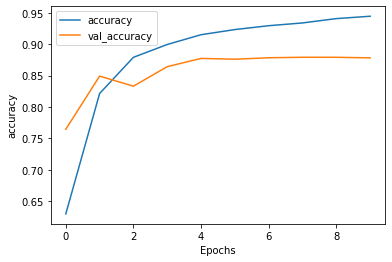

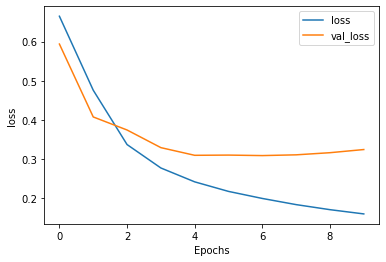

In [119]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [1]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

NameError: name 'history' is not defined

## Wrap Up

In this lab, you saw how subword text encoding can be a robust technique to avoid out-of-vocabulary tokens. It can decode uncommon words it hasn't seen before even with a relatively small vocab size. Consequently, it results in longer token sequences when compared to full word tokenization. Next week, you will look at other architectures that you can use when building your classifier. These will be recurrent neural networks and convolutional neural networks.